In [39]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')


### 1. Create a client to connect to plaid

In [40]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [6]:
client.Institutions.get(2)

{'institutions': [{'country_codes': ['CA'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Access Code (PAC)', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_118841',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Access Credit Union - Online Banking',
   'products': ['assets', 'balance', 'transactions', 'income', 'identity'],
   'routing_numbers': []},
  {'country_codes': ['GB'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_119371',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Aegon (Online Services)',
   'products': ['investments'],
   'routing_numbers': []}],
 'request_id': 'GvO0QGDfwNMjyJj',
 'total

### 2. Generate a public token

In [7]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions'])

### 3. Exchange the public token for an access token

In [8]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [9]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'rzvBZ5JbeWuyLGGkVAGpsXBzMz9PrzflQDZoy',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'zPvjb5m3gwfzrMMaQmM1FKDjmjdPQjIoVgxqo',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'BGJVm5R7aKfAeLLoDrLkSgQEjExXyEtwBL3Z4',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

### 1. Fetch the Transactions for the last 90 days

In [23]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-150))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token, start_date, end_date)
last_90_day_transactions = transaction_response['transactions']

# to print first 3 items of the last_90_day_transactions
print(json.dumps(last_90_day_transactions[0:3], indent=4, sort_keys=True))

[
    {
        "account_id": "r3PDmJ1LKQU81XAPygaXIXBD7zVdD9il9LD3R",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-01-31",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 2. Print the categories for each transaction

In [24]:
# YOUR CODE HERE
# we needed to find how to work with the dictionary that was returned from the API rather than the JSON print out, which returns a string. 
# thus, we use the transaction_response variable directly
# to iterate through transaction_response dictionary using for-loop list comprehension 
category_values = [i['category'] for i in last_90_day_transactions]
first_two = category_values[:2]
print(first_two)

[['Travel', 'Airlines and Aviation Services'], ['Travel', 'Taxi']]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [25]:
# YOUR CODE HERE
transaction_df = pd.DataFrame(last_90_day_transactions)
transaction_df.drop(columns=["account_id","account_owner", "authorized_date",
                              "category_id","iso_currency_code","location", 
                              "payment_channel","payment_meta","pending",
                              'pending_transaction_id','transaction_id','transaction_type',
                              'unofficial_currency_code'], inplace=True)
transaction_df["date"] = pd.to_datetime(transaction_df['date'])
transaction_df.head(100)


,amount,category,date,name
0,500.00,"[Travel, Airlines and Aviation Services]",2020-01-31,United Airlines
1,6.33,"[Travel, Taxi]",2020-01-29,Uber
2,500.00,"[Food and Drink, Restaurants]",2020-01-26,Tectra Inc
3,2078.50,[Payment],2020-01-25,AUTOMATIC PAYMENT - THANK
4,500.00,"[Food and Drink, Restaurants, Fast Food]",2020-01-25,KFC
...,...,...,...,...
75,-500.00,"[Travel, Airlines and Aviation Services]",2019-09-16,United Airlines
76,12.00,"[Food and Drink, Restaurants, Fast Food]",2019-09-15,McDonald's
77,4.33,"[Food and Drink, Restaurants, Coffee Shop]",2019-09-15,Starbucks
78,89.40,"[Food and Drink, Restaurants]",2019-09-14,SparkFun


In [26]:
#separates category list so that first category in list is the main category
transaction_df[['real category','other category','last column']] = pd.DataFrame(transaction_df.category.values.tolist(), index=transaction_df.index)


In [27]:

transaction_df.drop(columns=["category","other category", 'last column'],inplace=True)

In [28]:
#removes debit transactions
filtered_transaction_df = transaction_df.loc[transaction_df['amount'] > 0]

In [29]:
filtered_transaction_df.head(50)

,amount,date,name,real category
0,500.00,2020-01-31,United Airlines,Travel
1,6.33,2020-01-29,Uber,Travel
2,500.00,2020-01-26,Tectra Inc,Food and Drink
3,2078.50,2020-01-25,AUTOMATIC PAYMENT - THANK,Payment
4,500.00,2020-01-25,KFC,Food and Drink
5,500.00,2020-01-25,Madison Bicycle Shop,Shops
6,25.00,2020-01-16,CREDIT CARD 3333 PAYMENT *//,Payment
7,5.40,2020-01-16,Uber,Travel
8,5850.00,2020-01-15,ACH Electronic CreditGUSTO PAY 123456,Transfer
9,1000.00,2020-01-15,CD DEPOSIT .INITIAL.,Transfer


In [30]:
filtered_transaction_df.dtypes

amount                  float64
date             datetime64[ns]
name                     object
real category            object
dtype: object

---

# Budget Analysis



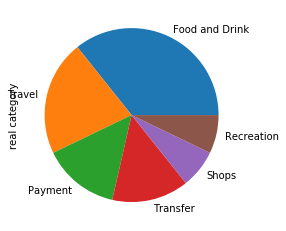

In [31]:
filtered_transaction_df['real category'].value_counts().plot(kind="pie")

## Generate a bar chart with the number of transactions for each category 

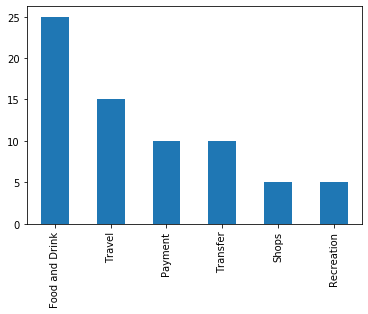

In [32]:
filtered_transaction_df['real category'].value_counts().plot(kind="bar")

## Calculate the total spending per category and print the results

In [33]:
spending_per_category = filtered_transaction_df.groupby('real category').sum()
spending_per_category.head()

,amount
real category,
Food and Drink,5528.65
Payment,10517.50
Recreation,392.50
Shops,2500.00
Transfer,34250.00


## Calculate the expenses per month

In [34]:
filtered_transaction_df.set_index("date",inplace=True)
bar_data = filtered_transaction_df.resample('MS').sum()
bar_data.head()

,amount
date,
2019-09-01,10643.13
2019-10-01,11155.79
2019-11-01,11149.46
2019-12-01,11149.46
2020-01-01,11649.46


## Plot the total expenses per month

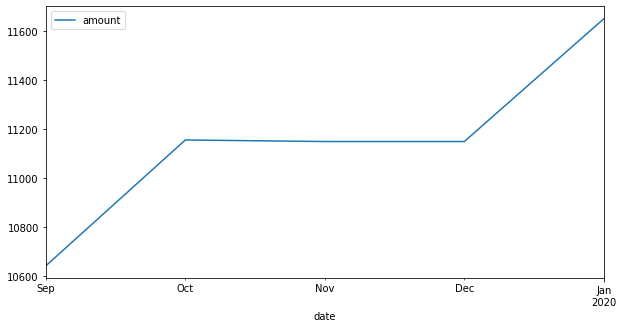

In [35]:
bar_data.plot(figsize=(10,5))

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [36]:
create_tkn_response_2 = client.Sandbox.public_token.create(INSTITUTION_ID, ['income'])

In [37]:
exchange_response_2 = client.Item.public_token.exchange(create_tkn_response_2['public_token'])
access_token_2 = exchange_response_2['access_token']

In [41]:
client.Income.get(access_token_2)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '1og8AstbYFdjV4z'}

In [42]:
income_response = client.Income.get(access_token_2)
last_year_income = income_response['income']



In [43]:
# to print first 3 items of the last_90_day_transactions
print(json.dumps(last_year_income))

{"income_streams": [{"confidence": 0.99, "days": 690, "monthly_income": 500, "name": "UNITED AIRLINES"}], "last_year_income": 6000, "last_year_income_before_tax": 7285, "max_number_of_overlapping_income_streams": 1, "number_of_income_streams": 1, "projected_yearly_income": 6085, "projected_yearly_income_before_tax": 7389}


## Last Year's income, Monthly income and Projected Income

In [44]:
print(income_response['income']['last_year_income_before_tax'])

7285


In [45]:
print(income_response['income']['income_streams'][0]['monthly_income'])

500


In [46]:
print(income_response['income']['projected_yearly_income_before_tax'])

7389
